In [2]:
import numpy as np
import pandas as pd
from flaml import automl
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\quera exer 1\\travel_times.csv", encoding='utf-8')
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Toll,Comments
0,1/6/2012,16:37,Friday,home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,8:20,Friday,work,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,home,51.27,1207.4,82.0,NaN,NaN,NaN,35.9,No,NaN
3,1/4/2012,7:53,Wednesday,work,49.17,132.3,74.2,82.9,NaN,39.8,35.6,NaN,NaN
4,1/3/2012,18:57,Tuesday,home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,8:09,Monday,work,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No,NaN
201,7/14/2011,8:03,Thursday,work,50.90,3123.7,76.2,NaN,7.89,40.1,32.1,Yes,NaN
202,7/13/2011,17:08,Wednesday,home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes,NaN
203,7/12/2011,17:51,Tuesday,home,53.28,125.8,61.6,NaN,NaN,51.9,36.5,Yes,NaN


In [4]:
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Toll,Comments
0,1/6/2012,16:37,Friday,home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,8:20,Friday,work,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,home,51.27,1207.4,82.0,NaN,NaN,NaN,35.9,No,NaN
3,1/4/2012,7:53,Wednesday,work,49.17,132.3,74.2,82.9,NaN,39.8,35.6,NaN,NaN
4,1/3/2012,18:57,Tuesday,home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  188 non-null    float64
 8   FuelEconomy     186 non-null    float64
 9   TotalTime       176 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Toll            174 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(7), object(6)
memory usage: 20.9+ KB


In [6]:
df.isna().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed     17
FuelEconomy        19
TotalTime          29
MovingTime          0
Toll               31
Comments          181
dtype: int64

In [7]:
df = df.drop(columns='Comments', inplace=True)
df

In [8]:
#fuel economy

mean_fe = df['FuelEconomy'].mean()
df['FuelEconomy'] = df['FuelEconomy'].fillna(mean_fe).round(2)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
mean_as = df['AvgMovingSpeed'].mean()
df['AvgMovingSpeed'] = df['AvgMovingSpeed'].fillna(mean_as).round(2)

In [ ]:
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Toll
0,1/6/2012,16:37,Friday,home,51.29,127.4,78.3,84.80,8.69,39.3,36.3,No
1,1/6/2012,8:20,Friday,work,51.63,130.3,81.8,88.90,8.69,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,home,51.27,1207.4,82.0,81.83,8.69,NaN,35.9,No
3,1/4/2012,7:53,Wednesday,work,49.17,132.3,74.2,82.90,8.69,39.8,35.6,NaN
4,1/3/2012,18:57,Tuesday,home,51.15,136.2,83.4,88.10,8.69,36.8,34.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,8:09,Monday,work,54.52,125.6,49.9,82.40,7.89,65.5,39.7,No
201,7/14/2011,8:03,Thursday,work,50.90,3123.7,76.2,81.83,7.89,40.1,32.1,Yes
202,7/13/2011,17:08,Wednesday,home,51.96,132.6,57.5,76.70,8.69,54.2,40.6,Yes
203,7/12/2011,17:51,Tuesday,home,53.28,125.8,61.6,81.83,8.69,51.9,36.5,Yes


In [ ]:
automl_reg = AutoML()
x_train, x_test = df.dropna(subset=['TotalTime']), df[df.TotalTime.isna()]
y_train = df[~df.TotalTime.isna()].TotalTime
# removing the columns with null values
x_train = x_train.drop(columns=['TotalTime','Toll'])
x_test = x_test.drop(columns=['TotalTime','Toll'])
# run the model
automl_reg.fit(x_train, y_train, estimator_list=["rf"], task="regression", verbose=False)
y_pred = automl_reg.predict(x_test)

In [ ]:
df.loc[df.TotalTime.isna(), 'TotalTime'] = y_pred
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    float64
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Toll            174 non-null    object 
dtypes: float64(7), object(5)
memory usage: 19.3+ KB


In [ ]:
automl_clf = AutoML()
x_train, x_test = df.dropna(subset=['Toll']), df[df.Toll.isna()]
y_train = df[~df.Toll.isna()].Toll
# removing the columns with null values
x_train = x_train.drop(columns=['Toll'])
x_test = x_test.drop(columns=['Toll'])
# run the model
automl_clf.fit(x_train, y_train, task="classification", estimator_list=["rf"], verbose=False)
y_pred = automl_clf.predict(x_test)

In [ ]:
df.loc[df.Toll.isna(), 'Toll'] = y_pred
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    float64
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Toll            205 non-null    object 
dtypes: float64(7), object(5)
memory usage: 19.3+ KB


<Axes: xlabel='MovingTime'>

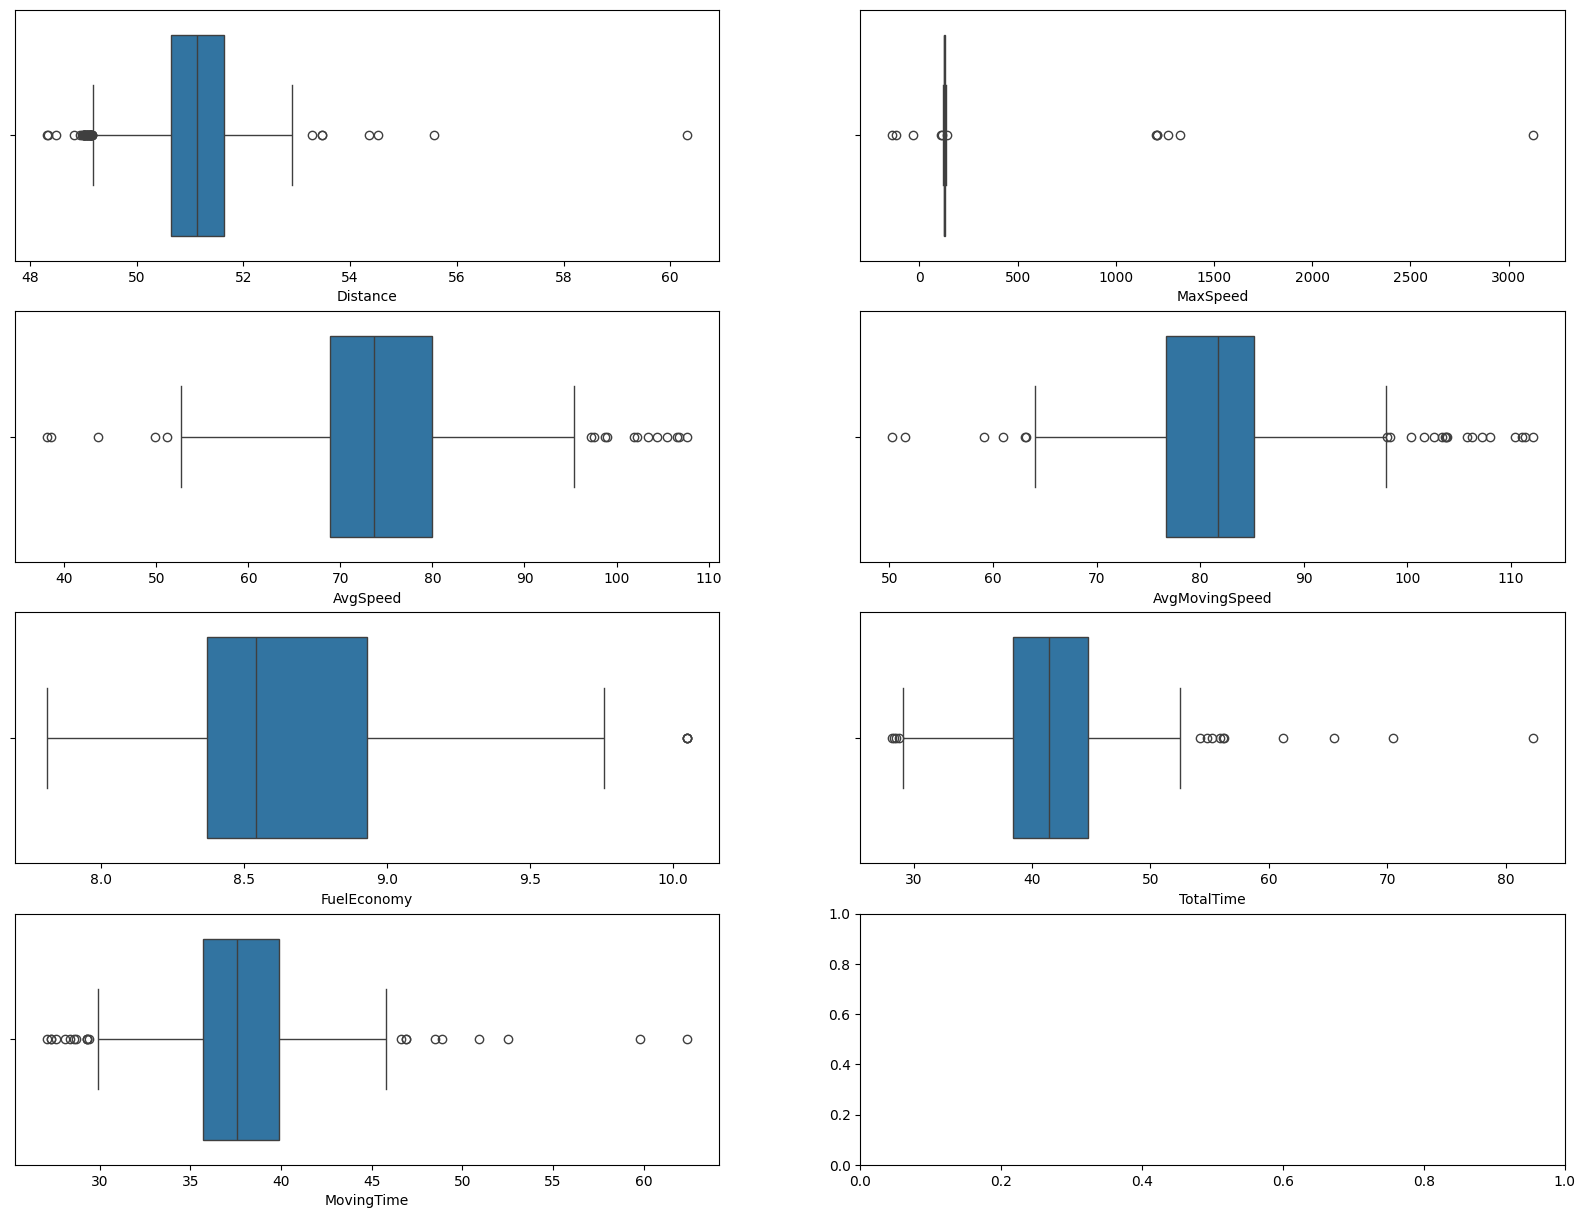

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20, 15))
sns.boxplot(x=df.Distance, ax = ax[0,0])
sns.boxplot(x=df.MaxSpeed, ax = ax[0,1])
sns.boxplot(x=df.AvgSpeed, ax = ax[1,0])
sns.boxplot(x=df.AvgMovingSpeed, ax = ax[1,1])
sns.boxplot(x=df.FuelEconomy, ax = ax[2,0])
sns.boxplot(x=df.TotalTime, ax = ax[2,1])
sns.boxplot(x=df.MovingTime, ax = ax[3,0])

In [ ]:
Q1 = df['MaxSpeed'].quantile(0.25)
Q2 = df['MaxSpeed'].quantile(0.5)
Q3 = df['MaxSpeed'].quantile(0.75)
IQR = Q3 - Q1
df["maxspeedoutlier"] = df['MaxSpeed'].apply(lambda p : p < Q1 - 1.5 * IQR or p > Q3 + 1.5 * IQR)
df[['MaxSpeed', 'maxspeedoutlier']].head(10)
#df[df.maxspeedoutlier]
outlier_speed  = df.loc[df['maxspeedoutlier'], 'MaxSpeed'].tolist()
outlier_speed.sort()
print(np.array(outlier_speed))


[-138.  -120.   -32.5  112.2  114.4  140.9 1205.  1207.4 1207.5 1263.7
 1328.5 3123.7]


In [ ]:
import plotly.express as px
fig = px.box(df, y='MaxSpeed')
fig.update_traces(marker_color='#FF851B')
fig.update_layout(autosize=False, width=600, height=500, title='Detected Outliers')
fig.show()


<Axes: xlabel='MaxSpeed'>

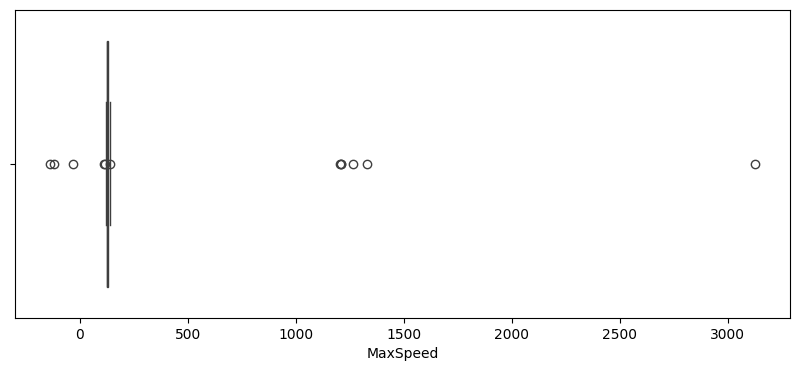

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x=df.MaxSpeed)

In [ ]:
import zlib
import zipfile


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

np.savez("answers.npz", outlier_speed= outlier_speed)
df.to_csv('preprocessed_df.csv',index = True)

file_names = ["answers.npz", "preprocessed_df.csv", "correct_routing.ipynb"]
compress(file_names)

File Paths:
['answers.npz', 'preprocessed_df.csv', 'correct_routing.ipynb']
